In [7]:
# IMPORT LIBRARY
import pandas as pd     # for DF
import numpy as np      # FOR MULTI DIMENTIONAL ARRY(ND ARRAY)
import matplotlib.pyplot as plt    # VISUALIZATION
import seaborn as sns                 # FOR STATISTICAL
import scipy.stats as stats           # SCIPY --> one of the statistical library to hanle statistican
                                                   #fun probability distribution summary, frquency all things



In [ ]:
# create the dataset

np.random.seed(42)          # we need to generate random num using np,every time numbers changed i don't want to change my number
                            # random number won't be generate
data = {
    'product_id' : range(1,21),
    'product_name' : [f'product{i}' for i in range(1,21)],
    'category': np.random.choice(['Electronic','Clothing','Home','Sports'], 20),
    'units_sold' : np.random.poisson(lam=20,size=20),
    'sales_date' : pd.date_range(start = '2023-01-01' , periods=20, freq='D'),
} 
sales_data = pd.DataFrame(data)
 
# display the dataset
print('Sales Data:')
print(sales_data)
                           
                            

Sales Data:
    product_id product_name    category  units_sold sales_date
0            1     product1        Home          25 2023-01-01
1            2     product2      Sports          15 2023-01-02
2            3     product3  Electronic          17 2023-01-03
3            4     product4        Home          19 2023-01-04
4            5     product5        Home          21 2023-01-05
5            6     product6      Sports          17 2023-01-06
6            7     product7  Electronic          19 2023-01-07
7            8     product8  Electronic          16 2023-01-08
8            9     product9        Home          21 2023-01-09
9           10    product10    Clothing          21 2023-01-10
10          11    product11        Home          17 2023-01-11
11          12    product12        Home          22 2023-01-12
12          13    product13        Home          14 2023-01-13
13          14    product14        Home          17 2023-01-14
14          15    product15      Sports    

In [ ]:
# Sava The DtaFrame to csv File(in oour)

sales_data.to_csv('sales_data.csv' , index=False)        # index=False --> no index column will be   created

In [ ]:
# now i want to know location where it stored csv file

import os
os.getcwd()                                                      # get current working directory

'c:\\Users\\Hanshu\\Desktop\\VS code\\inferential stats\\STATISTIC WORKSHOP_NIT'

In [13]:
  # descriptive stats     
# descriptive stats always deal with numbers so frst u go for (units_sold) column
  
descriptive_stats = sales_data['units_sold'].describe()  

print("\nDescriptive statistics for 'units_sold':")
print(descriptive_stats)

mean_sales     = sales_data['units_sold'].mean()
median_sales   = sales_data['units_sold'].median()
mode_sales     = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()


category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()


# display results

print('\n Statistical Analysis:')
print(f"Mean Units Sold : {mean_sales}")
print(f'Median Units Sold : {median_sales}')
print(f'Mode Units Sold : {mode_sales}')
print(f'Variance of Units Sold : {variance_sales}')
print(f'Standard Deviation of Units Sold : {std_deviation_sales}')
print('\nCategory Statistics')
print(category_stats)






Descriptive statistics for 'units_sold':
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 Statistical Analysis:
Mean Units Sold : 18.8
Median Units Sold : 18.5
Mode Units Sold : 17
Variance of Units Sold : 10.90526315789474
Standard Deviation of Units Sold : 3.3023117899275864

Category Statistics
     category  sum       mean       std
0    Clothing   21  21.000000       NaN
1  Electronic   73  18.250000  2.217356
2        Home  181  20.111111  3.723051
3      Sports  101  16.833333  2.714160


In [ ]:
 # inferential stats

Confidence_level = 0.95    #95%                                             
degrees_freedom = len(sales_data['units_sold']) - 1

sample_mean = mean_sales

sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))


# t-score                                                               # in this code entire , i need to find out the range of unit sold at 95% confidence level


t_score = stats.t.ppf((1 + Confidence_level)/2 , degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error , sample_mean + margin_of_error)
print("\n Confidence Interval for Mean of Units sold")
print(confidence_interval)





 Confidence Interval for Mean of Units sold
(17.254470507823573, 20.34552949217643)


In [ ]:
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print('\n Hypothesis Testing (t-test):')
print(f"T-statistics: {t_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print('Reject the null hypothesisi: The mean units sold is different from 20')
else:
    print('fail to reject the null hypothesis: the mean units sold is not different from 20')


 Hypothesis Testing (t-test):
T-statistics: -1.6250928099424466, p-value: 0.12061572226781002
fail to reject the null hypothesis: the mean units sold is not different from 20


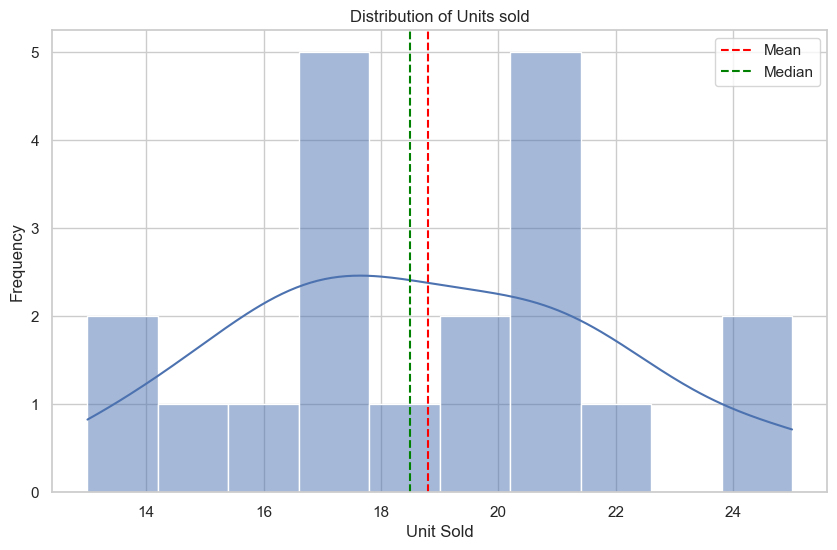

In [20]:
# visualization 

sns.set(style = 'whitegrid')

# plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title("Distribution of Units sold")
plt.xlabel('Unit Sold')
plt.ylabel("Frequency")
plt.axvline(mean_sales, color = 'red', linestyle='--', label='Mean')
plt.axvline(median_sales, color = 'green', linestyle='--', label='Median')
plt.legend()
plt.show()

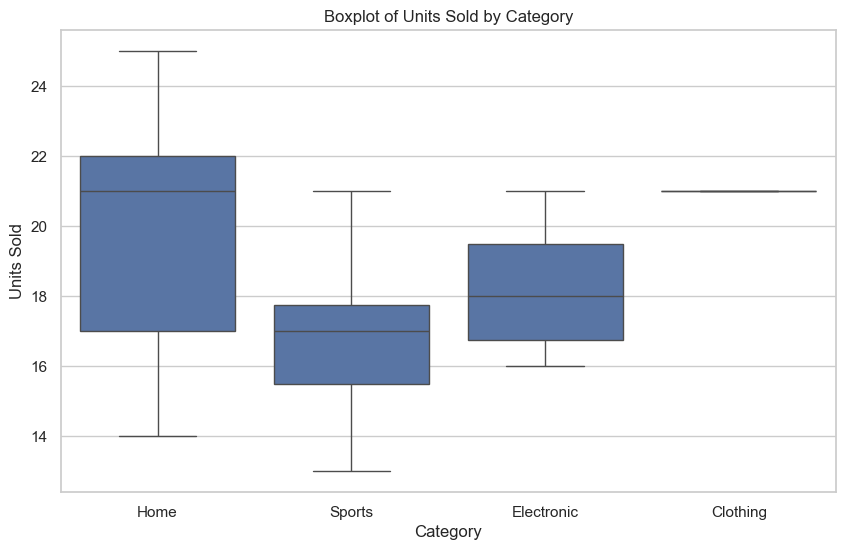

In [21]:
# Boxplot for units sold by catogeory

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title("Boxplot of Units Sold by Category")
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

In [23]:
# BAR plot for total units  sold by catogory

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Total Units_Sold', data = category_stats)
plt.title("Total Units Sold by Category")
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

ValueError: Could not interpret value `Category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>